In [1]:
import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')
import warnings
warnings.filterwarnings('ignore')


from obstacle_avoidance_processing import AvoidanceProcessing


Loading DLC 2.2.3...


In [2]:
# metadata json path
metadata_path = r'C:\Users\nlab\obstacle_avoidance\metadata\test_102822.json'

#C:\Users\nlab\Desktop\mike_bonsai\recordings\metadata
# task name
# 'oa' for object avoidance
# 'gd' for gap detection
task_name = 'oa'

In [3]:
session = AvoidanceProcessing(metadata_path, task=task_name) 

In [4]:
session.change_dlc_project(r'C:\Users\nlab\obstacle_avoidance\deeplabcut\obstacle_avoidance_100522-mike-2022-10-05\config.yaml')
session.dlc_project

'C:\\Users\\nlab\\obstacle_avoidance\\deeplabcut\\obstacle_avoidance_100522-mike-2022-10-05\\config.yaml'

In [ ]:
session.preprocess()

In [5]:
session.path

'C:/Users/nlab/obstacle_avoidance/recordings/test'

In [16]:
session.metadata

{'path': 'C:/Users/nlab/obstacle_avoidance/recordings/test',
 '101422': {'J19LT': {'oa': {'num_positions': 9}},
  'J19RT': {'oa': {'num_positions': 9}},
  'J20LT': {'oa': {'num_positions': 9}},
  'J20RT': {'oa': {'num_positions': 9}}}}

In [5]:
session.process()


0it [00:00, ?it/s]

J19LT
hey
73
df made


1it [00:06,  6.09s/it]

J19RT
hey
96
df made


2it [00:15,  7.80s/it]

J20LT
hey
59
df made
saving101422_J20LT_control_Rig2_oaraw


3it [00:21,  7.40s/it]

saving101422_J20LT_control_Rig2_oa processed
J20RT
hey
44
df made
saving101422_J20RT_control_Rig2_oaraw
saving101422_J20RT_control_Rig2_oa processed


4it [00:28,  7.07s/it]


In [6]:
session.gather_all_sessions()

In [9]:
session.all_sessions

,date,animal,task,poke1_ts,poke2_ts,top1_ts,poke1_t0,poke2_t0,top1_t0
0,101422,J19LT,oa,"[53931.119334, 53944.297369, 53951.318412, 539...","[53940.094643, 53946.980492, 53954.480793, 539...","[53922.343654, 53922.358566, 53922.375539, 539...",53931.119334,53940.094643,53922.343654
1,101422,J19RT,oa,"[52425.162777, 52437.689369, 52448.200614, 524...","[52432.724736, 52444.984921, 52457.07735, 5247...","[52416.221273, 52416.240998, 52416.254092, 524...",52425.162777,52432.724736,52416.221273
2,101422,J20LT,oa,"[54998.431014, 55007.786944, 55013.640652, 550...","[55001.433536, 55010.338956, 55016.753996, 550...","[54995.74752, 54995.763571, 54995.78048, 54995...",54998.431014,55001.433536,54995.747520
3,101422,J20RT,oa,"[55589.910694, 55596.043072, 55602.859289, 556...","[55592.573363, 55598.701414, 55606.25518, 5561...","[55587.060569, 55587.074611, 55587.091456, 555...",55589.910694,55592.573363,55587.060569


In [11]:
from pathlib import Path

In [10]:
session.path

'C:/Users/nlab/obstacle_avoidance/recordings'

In [12]:
 data_path = Path(session.path).expanduser()

In [14]:
session.dates_list

['101222', '101322', '101422']

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json, os, cv2
from src.base import BaseInput

In [7]:
df= pd.read_hdf(r'C:\Users\nlab\obstacle_avoidance\recordings\test\101422\J19LT\oa\df_J19LT_101422_oa.h5')


In [10]:
df.head()

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,rightportT_x,rightportT_y,rightportT_likelihood,rightportB_x,rightportB_y,rightportB_likelihood,len,animal,date,task
0,53931.119334,53940.094643,"[53931.128166, 53931.144883, 53931.1616, 53931...","[527, 528, 529, 530, 531, 532, 533, 534, 535, ...","[112.06803131103516, 112.33856201171875, 112.0...","[268.1237487792969, 269.8249206542969, 267.880...","[0.9999982118606567, 0.9999991655349731, 0.999...","[131.6146240234375, 131.09303283691406, 131.25...","[257.6217956542969, 256.9167785644531, 257.519...","[1.0, 0.9999998807907104, 0.9999998807907104, ...",...,"[579.5570068359375, 579.4026489257812, 579.473...","[252.883544921875, 253.1400604248047, 253.2790...","[0.9999992847442627, 0.9999992847442627, 0.999...","[568.0769653320312, 567.5494384765625, 567.379...","[252.24595642089844, 252.4822998046875, 252.54...","[0.9999983310699463, 0.9999986886978149, 0.999...",537.0,J19LT,101422,oa
1,53940.094643,53944.297369,"[53940.098099, 53940.114764, 53940.131865, 539...","[[1065, 1066, 1067, 1068, 1069, 1070, 1071, 10...","[573.6846923828125, 573.556884765625, 573.9543...","[254.9643096923828, 255.49862670898438, 254.77...","[0.9999905824661255, 0.9999914169311523, 0.999...","[552.3197631835938, 552.917236328125, 552.9116...","[261.05511474609375, 261.68682861328125, 262.0...","[0.9999995231628418, 0.9999996423721313, 0.999...",...,"[580.5990600585938, nan, nan, 580.444885253906...","[252.2528076171875, nan, nan, 253.288360595703...","[0.9963997602462769, 0.9892962574958801, 0.989...","[nan, nan, nan, 567.5686645507812, 568.1206054...","[nan, nan, nan, 250.9944305419922, 250.5881652...","[0.9892849326133728, 0.9802637696266174, 0.984...",251.0,J19LT,101422,oa
2,53944.297369,53946.980492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J19LT,101422,oa
3,53951.318412,53954.480793,"[53951.319462, 53951.335385, 53951.352089, 539...","[1738, 1739, 1740, 1741, 1742, 1743, 1744, 174...","[113.58011627197266, 113.11833190917969, 112.8...","[263.170166015625, 263.0608825683594, 263.4785...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[126.71595764160156, 126.5731430053711, 126.04...","[272.8536376953125, 273.0172424316406, 272.302...","[1.0, 1.0, 1.0, 0.9999998807907104, 1.0, 1.0, ...",...,"[581.955810546875, 582.044921875, 581.77191162...","[254.14134216308594, 254.14710998535156, 254.1...","[0.9999991655349731, 0.9999992847442627, 0.999...","[566.8245849609375, 567.272705078125, 567.1059...","[254.1070098876953, 253.84640502929688, 254.36...","[0.9999980926513672, 0.9999983310699463, 0.999...",189.0,J19LT,101422,oa
4,53954.480793,53957.675942,"[53954.4864, 53954.503116, 53954.519692, 53954...","[[1928, 1929, 1930, 1931, 1932, 1933, 1934, 19...","[573.322021484375, 573.4615478515625, 574.2760...","[257.3003234863281, 256.8702392578125, 257.238...","[0.9999902248382568, 0.9999855756759644, 0.999...","[554.3242797851562, 554.6775512695312, 555.476...","[260.22119140625, 260.70306396484375, 261.5265...","[0.9999997615814209, 0.9999997615814209, 0.999...",...,"[580.329833984375, 579.8134765625, 580.5041503...","[252.33717346191406, 252.07781982421875, 252.5...","[0.9976133108139038, 0.9980608820915222, 0.996...","[571.9110717773438, 571.84375, 572.57141113281...","[250.75686645507812, 250.44296264648438, 251.1...","[0.9969620108604431, 0.996640682220459, 0.9955...",191.0,J19LT,101422,oa


In [11]:
df = df[df['trial_vidframes'].notna()]

In [13]:
df.head()

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,rightportT_x,rightportT_y,rightportT_likelihood,rightportB_x,rightportB_y,rightportB_likelihood,len,animal,date,task
0,53931.119334,53940.094643,"[53931.128166, 53931.144883, 53931.1616, 53931...","[527, 528, 529, 530, 531, 532, 533, 534, 535, ...","[112.06803131103516, 112.33856201171875, 112.0...","[268.1237487792969, 269.8249206542969, 267.880...","[0.9999982118606567, 0.9999991655349731, 0.999...","[131.6146240234375, 131.09303283691406, 131.25...","[257.6217956542969, 256.9167785644531, 257.519...","[1.0, 0.9999998807907104, 0.9999998807907104, ...",...,"[579.5570068359375, 579.4026489257812, 579.473...","[252.883544921875, 253.1400604248047, 253.2790...","[0.9999992847442627, 0.9999992847442627, 0.999...","[568.0769653320312, 567.5494384765625, 567.379...","[252.24595642089844, 252.4822998046875, 252.54...","[0.9999983310699463, 0.9999986886978149, 0.999...",537.0,J19LT,101422,oa
1,53940.094643,53944.297369,"[53940.098099, 53940.114764, 53940.131865, 539...","[[1065, 1066, 1067, 1068, 1069, 1070, 1071, 10...","[573.6846923828125, 573.556884765625, 573.9543...","[254.9643096923828, 255.49862670898438, 254.77...","[0.9999905824661255, 0.9999914169311523, 0.999...","[552.3197631835938, 552.917236328125, 552.9116...","[261.05511474609375, 261.68682861328125, 262.0...","[0.9999995231628418, 0.9999996423721313, 0.999...",...,"[580.5990600585938, nan, nan, 580.444885253906...","[252.2528076171875, nan, nan, 253.288360595703...","[0.9963997602462769, 0.9892962574958801, 0.989...","[nan, nan, nan, 567.5686645507812, 568.1206054...","[nan, nan, nan, 250.9944305419922, 250.5881652...","[0.9892849326133728, 0.9802637696266174, 0.984...",251.0,J19LT,101422,oa
3,53951.318412,53954.480793,"[53951.319462, 53951.335385, 53951.352089, 539...","[1738, 1739, 1740, 1741, 1742, 1743, 1744, 174...","[113.58011627197266, 113.11833190917969, 112.8...","[263.170166015625, 263.0608825683594, 263.4785...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[126.71595764160156, 126.5731430053711, 126.04...","[272.8536376953125, 273.0172424316406, 272.302...","[1.0, 1.0, 1.0, 0.9999998807907104, 1.0, 1.0, ...",...,"[581.955810546875, 582.044921875, 581.77191162...","[254.14134216308594, 254.14710998535156, 254.1...","[0.9999991655349731, 0.9999992847442627, 0.999...","[566.8245849609375, 567.272705078125, 567.1059...","[254.1070098876953, 253.84640502929688, 254.36...","[0.9999980926513672, 0.9999983310699463, 0.999...",189.0,J19LT,101422,oa
4,53954.480793,53957.675942,"[53954.4864, 53954.503116, 53954.519692, 53954...","[[1928, 1929, 1930, 1931, 1932, 1933, 1934, 19...","[573.322021484375, 573.4615478515625, 574.2760...","[257.3003234863281, 256.8702392578125, 257.238...","[0.9999902248382568, 0.9999855756759644, 0.999...","[554.3242797851562, 554.6775512695312, 555.476...","[260.22119140625, 260.70306396484375, 261.5265...","[0.9999997615814209, 0.9999997615814209, 0.999...",...,"[580.329833984375, 579.8134765625, 580.5041503...","[252.33717346191406, 252.07781982421875, 252.5...","[0.9976133108139038, 0.9980608820915222, 0.996...","[571.9110717773438, 571.84375, 572.57141113281...","[250.75686645507812, 250.44296264648438, 251.1...","[0.9969620108604431, 0.996640682220459, 0.9955...",191.0,J19LT,101422,oa
5,53957.675942,53959.834790,"[53957.6875, 53957.704358, 53957.721318, 53957...","[2120, 2121, 2122, 2123, 2124, 2125, 2126, 212...","[113.3506088256836, 112.271240234375, 113.0620...","[262.0062255859375, 261.8520812988281, 261.812...","[0.9999998807907104, 0.9999998807907104, 0.999...","[128.45396423339844, 128.70774841308594, 128.8...","[271.0116882324219, 271.1612854003906, 271.129...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907...",...,"[578.7299194335938, 578.4097900390625, 578.626...","[251.61444091796875, 251.17466735839844, 251.6...","[0.9999992847442627, 0.9999994039535522, 0.999...","[568.7576293945312, 

In [14]:
 df1 = pd.read_hdf(r'C:\Users\nlab\obstacle_avoidance\recordings\101422\J20LT\oa\frames_J20LT_101422_oa.h5')

ValueError: Dataset(s) incompatible with Pandas data types, not table, or no datasets found in HDF5 file.

In [6]:
df = pd.read_hdf(r'C:\Users\nlab\obstacle_avoidance\recordings\100322\J19LT\oa\raw_J19LT_100322_oa.h5')  
df['odd'] = np.nan
for i, ind in enumerate(df.index.values):
    if ind%2 == 0: # odd values
        df.at[ind, 'odd'] = True
    elif ind%2 == 1:
        df.at[ind, 'odd'] = False

dist_to_posts = np.median(df['arenaTR_x'].iloc[0],0) - np.median(df['arenaTL_x'].iloc[0],0)
pxl2cm= dist_to_posts/48.26
x_cols = [i for i in df.columns.values if '_x' in i]
y_cols = [i for i in df.columns.values if '_y' in i]
for i in range(len(x_cols)):
    df[x_cols[i]+'_cm'] = df.loc[:,x_cols[i]] / pxl2cm
    df[y_cols[i]+'_cm'] = df.loc[:,y_cols[i]] / pxl2cm

In [7]:
## take last index of obstacle and median of arena points
arena_cols = [col for col in df.columns if 'arena' in col]
arena_cols =[col for col in arena_cols if 'likelihood' not in col]
for col in arena_cols:
    for ind,row in df.iterrows():
        df.at[ind,col] = np.nanmedian(row[col])
        


obstacle_cols = [col for col in df.columns if 'obstacle' in col]
obstacle_cols = [col for col in obstacle_cols if 'likelihood' not in col]
obstacle_cols = [col for col in obstacle_cols if 'std' not in col]
for col in obstacle_cols:
    for ind,row in df.iterrows():
        df.at[ind,col+'_lind'] = row[col][np.isfinite(row[col].astype(float))][-1]
       


In [8]:
## obstacle center based on last index 
index = '_lind'
for ind, row in df.iterrows():
    xvals = np.stack([row['obstacleTL_x'+ index], row['obstacleTR_x'+ index], row['obstacleBL_x'+ index], row['obstacleBR_x'+ index]]).astype(float)
    xvals_cm = np.stack([row['obstacleTL_x_cm'+ index], row['obstacleTR_x_cm'+ index], row['obstacleBL_x_cm'+ index], row['obstacleBR_x_cm'+ index]]).astype(float)
    df.at[ind,'obstacle_x'+ index] = np.nanmean(xvals)
    df.at[ind,'obstacle_x_cm'+ index] = np.nanmean(xvals_cm) 
    
    yvals = np.stack([row['obstacleTL_y'+ index], row['obstacleTR_y'+ index], row['obstacleBL_y'+ index], row['obstacleBR_y'+ index]]).astype(float)
    yvals_cm = np.stack([row['obstacleTL_y_cm'+ index], row['obstacleTR_y_cm'+ index], row['obstacleBL_y_cm'+ index], row['obstacleBR_y_cm'+ index]]).astype(float)
    df.at[ind,'obstacle_y'+ index] = np.nanmean(yvals)
    df.at[ind,'obstacle_y_cm'+ index] = np.nanmean(yvals_cm)


In [12]:
import seaborn as sns

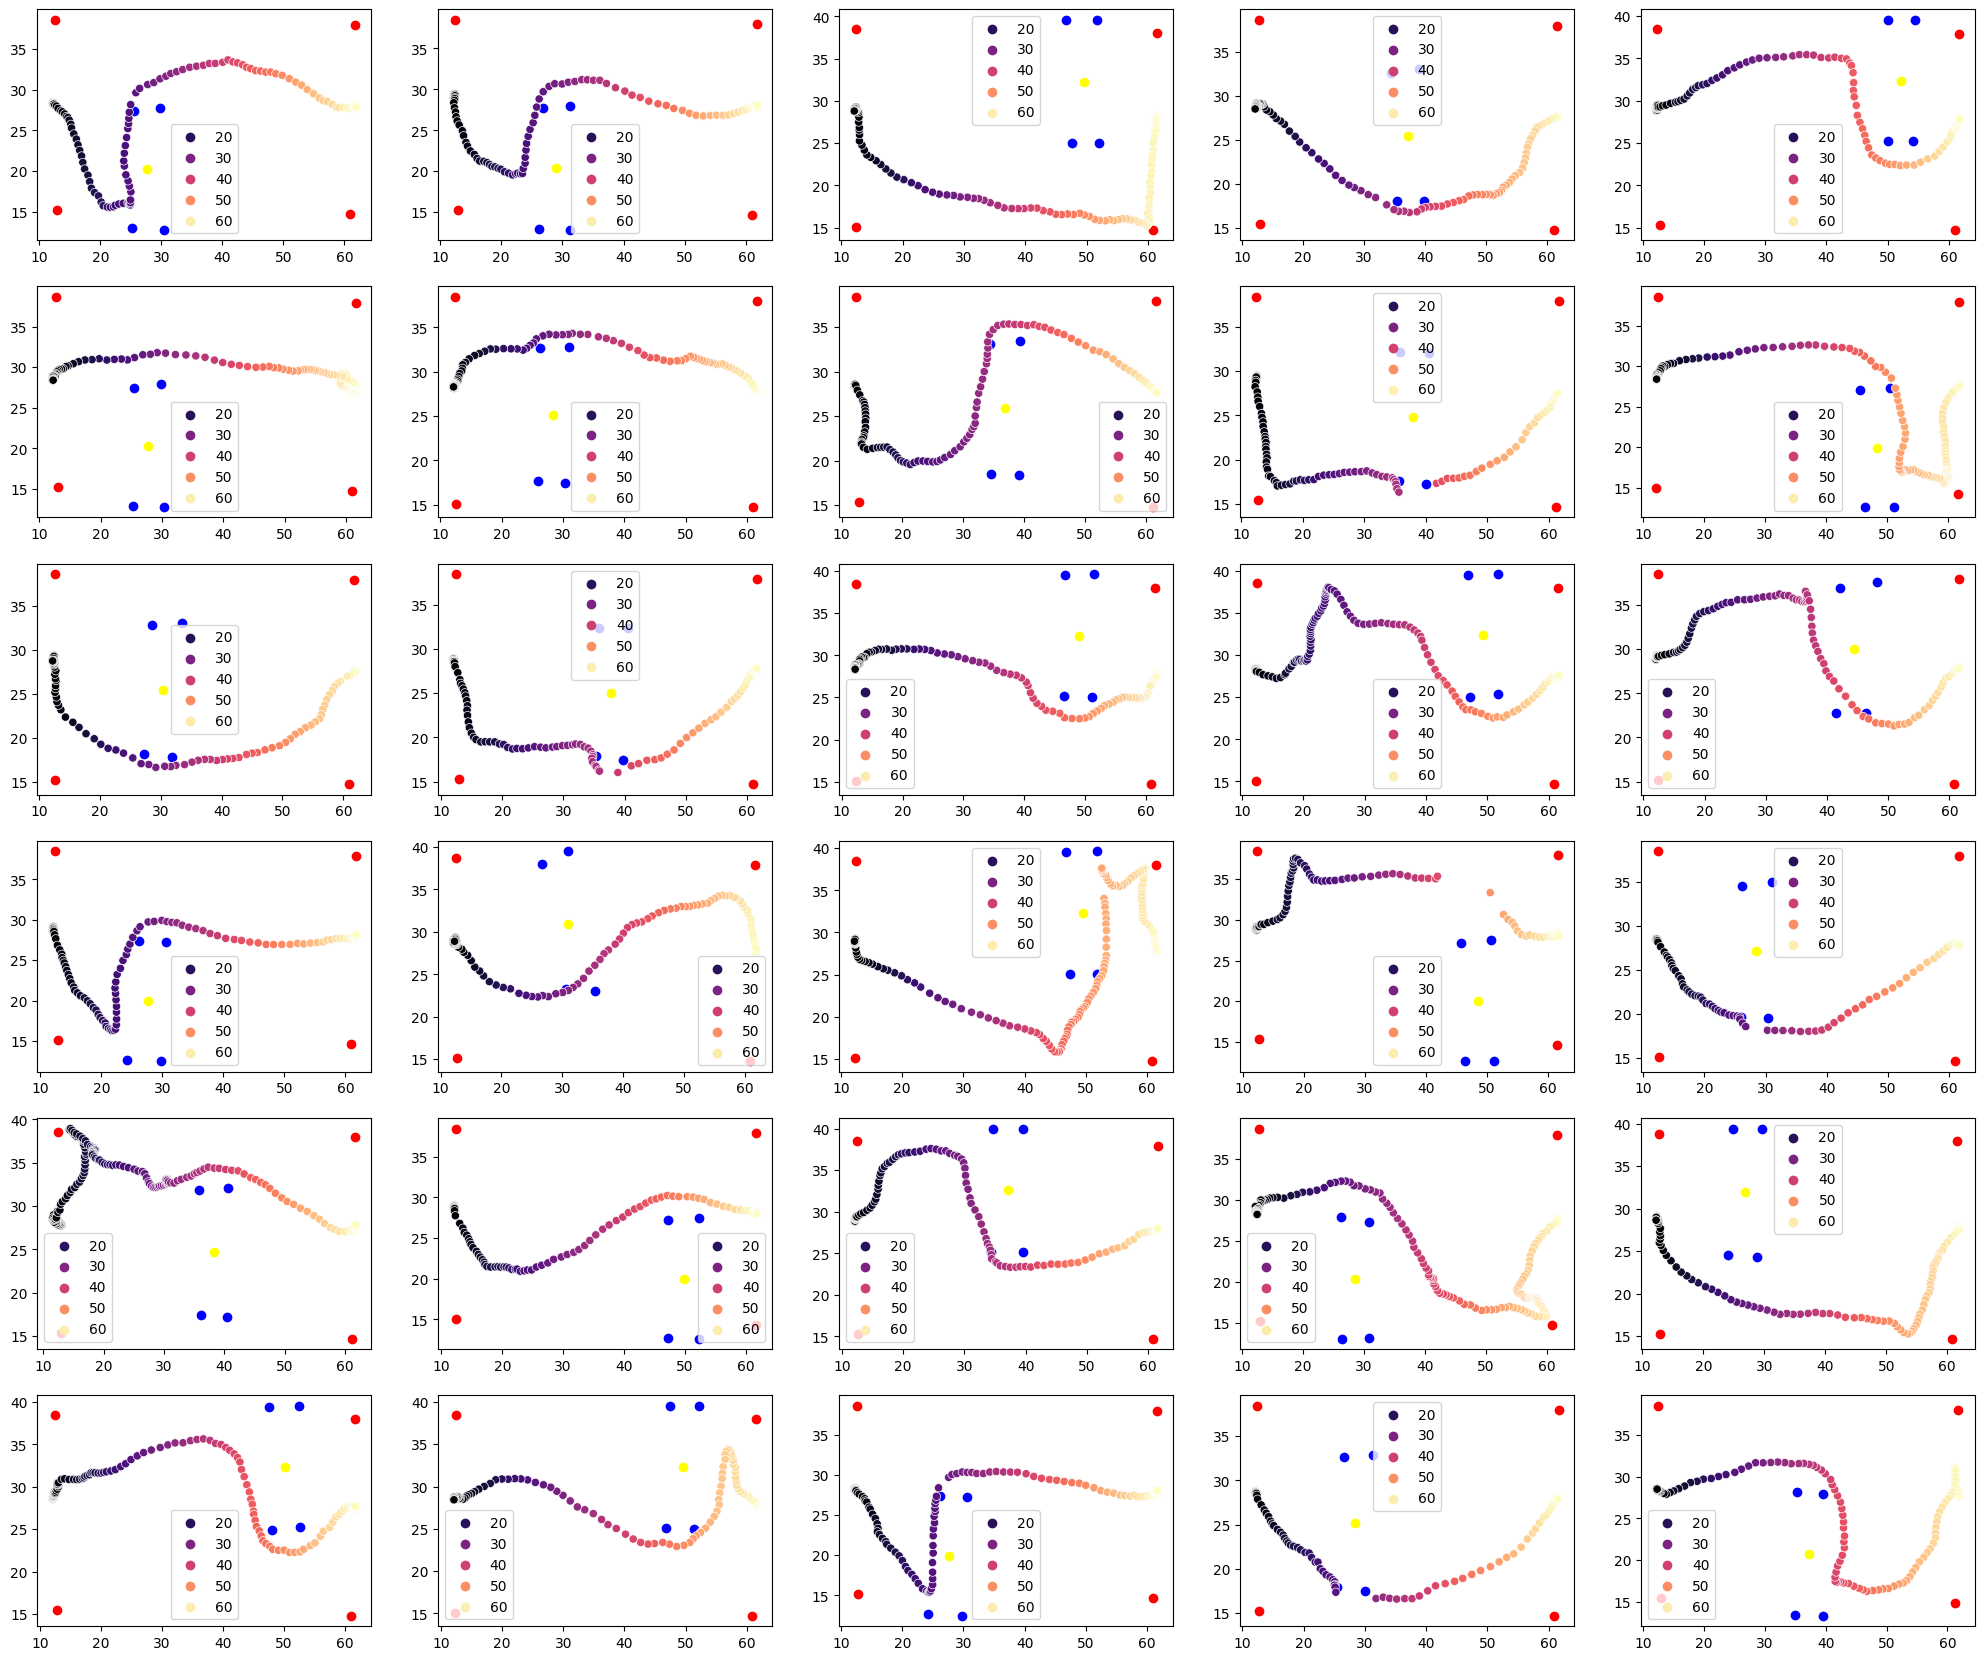

In [13]:
#test=test.reset_index()
test = df.sample(30)
test = test.reset_index()
plt.subplots(6,5, figsize=(25,21)) 
for ind, row in test.iterrows():
    plt.subplot(6,5,ind +1)
    plt.scatter([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBL_x_cm'], row['arenaBR_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']],color='red')

    plt.scatter([row['obstacleTL_x_cm_lind'], row['obstacleTR_x_cm_lind'], row['obstacleBL_x_cm_lind'], row['obstacleBR_x_cm_lind']],
                [row['obstacleTL_y_cm_lind'], row['obstacleTR_y_cm_lind'], row['obstacleBL_y_cm_lind'], row['obstacleBR_y_cm_lind']],color='blue')
    plt.scatter(row['obstacle_x_cm_lind'],row['obstacle_y_cm_lind'],color='yellow')

   
    sns.scatterplot(x=row['nose_x_cm'],y=row['nose_y_cm'],hue = row['nose_x_cm'], palette ='magma')            
                

In [62]:
test[['']]

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,rightportT_x_cm,rightportT_y_cm,rightportB_x_cm,rightportB_y_cm,obstacle_x,obstacle_x_cm,obstacle_x_std,obstacle_y,obstacle_y_cm,obstacle_y_std
0,52,63505.011712,63520.524620,"[63505.019686, 63505.036108, 63505.052774, 635...","[18420, 18421, 18422, 18423, 18424, 18425, 184...","[114.86739349365234, 115.15232849121094, 114.5...","[265.1737365722656, 264.5727233886719, 265.327...","[132.2296142578125, 132.04318237304688, 131.56...","[264.931640625, 264.8052673339844, 265.3870849...","[128.26657104492188, 128.45938110351562, 128.0...",...,"[61.69410873321727, 61.6417876547938, 61.71201...","[26.654649612824908, 26.665233050989386, 26.71...","[60.63674215021022, 60.69263338813762, 60.5604...","[26.534703980294143, 26.601559777427962, 26.63...",34.300393,34.300393,0.764463,37.063611,37.063611,2.159554
1,55,63537.848000,63544.279436,"[63537.864243, 63537.881459, 63537.897433, 635...","[[20390, 20391, 20392, 20393, 20394, 20395, 20...","[570.2232055664062, 569.9671630859375, 570.802...","[258.0972900390625, 258.2244873046875, 258.113...","[557.015869140625, 556.9907836914062, 557.0140...","[246.8000030517578, 247.10902404785156, 247.17...","[550.3031005859375, 550.3987426757812, 550.884...",...,"[61.67984112498076, 61.64324699006548, 61.6718...","[26.79452755010435, 26.78338546015618, 26.7576...","[60.63146508962959, 60.63878782554641, 60.7036...","[26.78355973345313, 26.765006956578464, 26.763...",30.349744,30.349744,4.873094,28.155580,28.155580,5.008681
2,1,63229.835737,63233.886988,"[63229.841587, 63229.857971, 63229.874572, 632...","[[1915, 1916, 1917, 1918, 1919, 1920, 1921, 19...","[569.733154296875, 569.970703125, 569.74591064...","[257.3892822265625, 257.12530517578125, 257.15...","[557.7861328125, 558.2794189453125, 558.036621...","[244.46926879882812, 244.72145080566406, 244.5...","[548.0977783203125, 548.9324951171875, 548.731...",...,"[61.73429257230531, 61.69051902904452, 61.6911...","[26.76478219288707, 26.726091892241147, 26.711...","[60.578727058271355, 60.6297712183321, 60.5898...","[26.75554570814857, 26.709415403572923, 26.709...",30.779012,30.779012,4.425388,29.719773,29.719773,6.136085
3,65,63595.254105,63603.069977,"[63595.267737, 63595.283814, 63595.300723, 635...","[[23833, 23834, 23835, 23836, 23837, 23838, 23...","[569.0010375976562, 569.2662963867188, 569.599...","[259.0525207519531, 259.1631774902344, 259.335...","[558.9092407226562, 558.7410888671875, 558.640...","[246.99937438964844, 247.15557861328125, 247.6...","[550.5185546875, 550.381591796875, 550.6304931...",...,"[61.64352061542892, 61.65834850417152, 61.6454...","[26.755498475198927, 26.758804781673827, 26.77...","[60.60429148508417, 60.5860823686362, 60.64927...","[26.74869204428336, 26.799293191850925, 26.811...",33.086297,33.086297,0.584331,25.102378,25.102378,4.075984
4,5,63253.692748,63258.067686,"[63253.699276, 63253.716531, 63253.73271, 6325...","[[3346, 3347, 3348, 3349, 3350, 3351, 3352, 33...","[567.7761840820312, 567.9352416992188, 567.834...","[260.19580078125, 259.65631103515625, 259.8600...","[555.2067260742188, 554.922119140625, 552.5525...","[248.92391967773438, 249.0541534423828, 250.78...","[554.1431274414062, 554.2879028320312, 555.561...",...,"[61.678440423715536, 61.6587850017751, 61.6080...","[26.857150297716853, 26.823502521625752, 26.78...","[60.30430036340994, 60.27462504125593, 60.2010...","[26.893094572393967, 26.833173875245432, 26.81...",29.960343,29.960343,4.697552,30.066873,30.066873,8.439652


In [20]:
session.positions

AttributeError: 'AvoidanceProcessing' object has no attribute 'positions'